# Physiology Lab - Fall 2019
# Oxygen Equilibrium of Hemocyanin Report

For this report, Dr. Beers only wants three graphs generated from the data obtained during lab. 

1. Plot % Oxygen Saturation (y-axis) as a funciton of oxygen partial pressure (x-axis). Determine the P<sub>50</sub> of the pigment under the experimental conditions.

In [2]:
hemodat = read.csv('OxygenEqHemo.csv')
hemodat$pH = as.factor(hemodat$pH)

In [3]:
hemodat$hill = log((hemodat$Percent.Oxy.Sat)*100/(100-(hemodat$Percent.Oxy.Sat*100)))
head(hemodat)

pH,Volume.O2.Added..mL.,Absorbance,Barometric.Pressure..Torr.,Vapor.Pressure..Torr.,Volume.of.Tonometer..mL.,PO2,Percent.Oxy.Sat,hill
<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
7.3,0,0.007,764.25,24.195,610,0.000000,NA,NA
7.3,5,0.017,764.25,24.195,610,6.066025,0.03717472,-3.2542430
7.3,15,0.027,764.25,24.195,610,18.198074,0.07434944,-2.5217206
7.3,35,0.070,764.25,24.195,610,42.462172,0.23420074,-1.1847414
7.3,55,0.153,764.25,24.195,610,66.726270,0.54275093,0.1714223
7.3,65,0.194,764.25,24.195,610,78.858320,0.69516729,0.8243894


In [4]:
hem_73 = hemodat[hemodat$pH == '7.3',]
hem_68 = hemodat[hemodat$pH == '6.8',]
hem_78 = hemodat[hemodat$pH == '7.8',]
hem_73

pH,Volume.O2.Added..mL.,Absorbance,Barometric.Pressure..Torr.,Vapor.Pressure..Torr.,Volume.of.Tonometer..mL.,PO2,Percent.Oxy.Sat,hill
<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
7.3,0,0.007,764.25,24.195,610,0.000000,NA,NA
7.3,5,0.017,764.25,24.195,610,6.066025,0.03717472,-3.2542430
7.3,15,0.027,764.25,24.195,610,18.198074,0.07434944,-2.5217206
7.3,35,0.070,764.25,24.195,610,42.462172,0.23420074,-1.1847414
7.3,55,0.153,764.25,24.195,610,66.726270,0.54275093,0.1714223
7.3,65,0.194,764.25,24.195,610,78.858320,0.69516729,0.8243894
7.3,70,0.201,764.25,24.195,610,84.924344,0.72118959,0.9503700
7.3,75,0.223,764.25,24.195,610,90.990369,0.80297398,1.4049865


In [5]:
require(nlme)
require(ggplot2)
require(ggpubr)

Loading required package: nlme

Loading required package: ggplot2

Loading required package: ggpubr

Loading required package: magrittr



Nonlinear regression model
  model: Percent.Oxy.Sat ~ SSlogis(PO2, Asym, xmid, scal)
   data: hem_73
   Asym    xmid    scal 
 0.9347 61.2645 17.4007 
 residual sum-of-squares: 0.0007583

Number of iterations to convergence: 0 
Achieved convergence tolerance: 4.584e-07

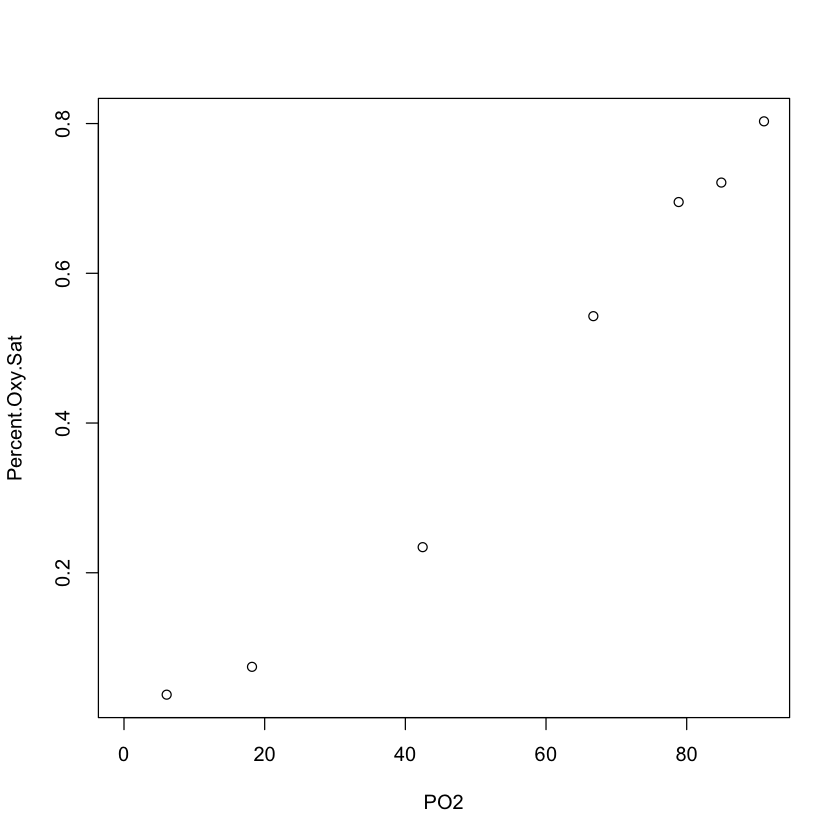

In [33]:
fit73 = nls(Percent.Oxy.Sat~SSlogis(PO2,Asym,xmid,scal), data=hem_73)
fit73
#plot(Percent.Oxy.Sat~PO2,data=hem_73,type="p")
nd = seq(0, max(hem_73$PO2), 0.01)
#plot(predict(fit73)~PO2, data=hem_73, type="l")

2. Estimate the cooperativity of the hemocyanin (i.e. Create a Hill Plot). An estimate of cooperativity between hemocyanin subunits can bbe obtained by plotting the log of percent saturation ove rpercent unsaturation as a function of the log of Po<sub>2</sub> and measuring the slope of the line around P<sub>50</sub> (n or sometimes n<sub>50</sub>). This number is an indec of cooperativity. The higher the number, the grater the cooperativity.

In [ ]:
summary(lm(hill~log(PO2), data=hem_73))
plot(hill~log(PO2), data=hem_73)
abline(a = -6.948, b = 1.733)

3. Create a magnitude of Bohr Shift graph.

In [ ]:
?glm